# Tutorial 4: Bathymetry data from the Canadian Hydrographic Service
This tutorial shows how to read, interpolate and visualize bathymetry data stored in GeoTIFF format obtained from the [Canadian Hydrographic Service](https://open.canada.ca/data/en/dataset/d3881c4c-650d-4070-bf9b-1e00aabf0a1d)

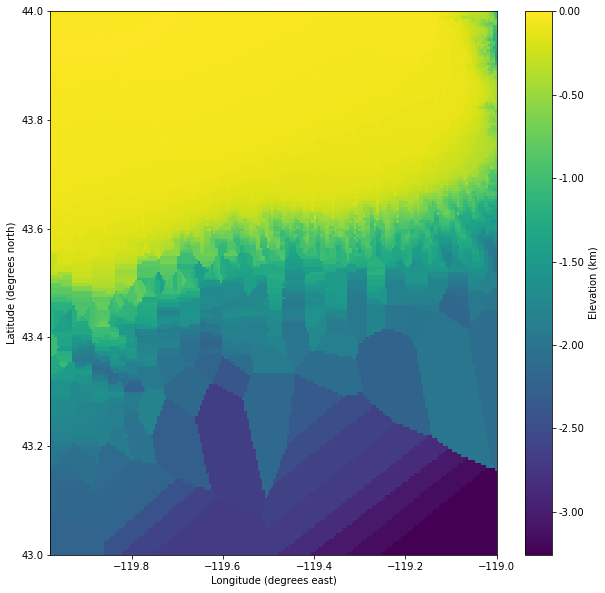

In [2]:
from kadlu.bathy_reader import BathyReader
from kadlu.bathy_interpolator import BathyInterpolator
import matplotlib.pyplot as plt

# folder where the GeoTIFF files are stored
folder = 'assets/tif/'

# reader
reader = BathyReader(folder) 

# interpolator (select between 'linear', 'nearest', 'cubic')
interp = BathyInterpolator(reader, method='nearest') 

# plot the bathymetry 
interp.plot_ll(lat_bins=200, lon_bins=200)

# draw the plot
plt.show()